Import pandas, datetime, and matplotlib:

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

Import China PM2.5 data as Dataframe for Beijing:

In [2]:
# Data obtained from UCI Repository (https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities)
df_Beijing = pd.read_csv('BeijingPM20100101_20151231.csv')
df_Beijing.info()
df_Beijing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
No                 52584 non-null int64
year               52584 non-null int64
month              52584 non-null int64
day                52584 non-null int64
hour               52584 non-null int64
season             52584 non-null int64
PM_Dongsi          25052 non-null float64
PM_Dongsihuan      20508 non-null float64
PM_Nongzhanguan    24931 non-null float64
PM_US Post         50387 non-null float64
DEWP               52579 non-null float64
HUMI               52245 non-null float64
PRES               52245 non-null float64
TEMP               52579 non-null float64
cbwd               52579 non-null object
Iws                52579 non-null float64
precipitation      52100 non-null float64
Iprec              52100 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 7.2+ MB


,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


Index df_Beijing using DateTime:

In [3]:
df_Beijing.index = pd.to_datetime(df_Beijing.year*1000000 + df_Beijing.month*10000 + df_Beijing.day*100 + df_Beijing.hour, format='%Y%m%d%H')

Preview the data by plotting monthly for the entire DateTime range for all measurement centers:

Populating the interactive namespace from numpy and matplotlib


/Users/kevinlimkrailassiri/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


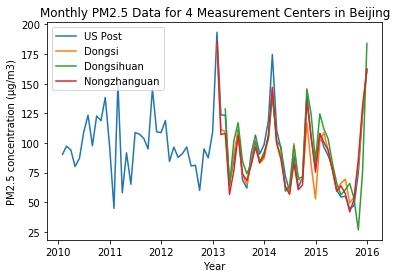

In [4]:
%pylab inline

plt.figure()
title('Monthly PM2.5 Data for 4 Measurement Centers in Beijing')
plot(df_Beijing['PM_US Post'].resample('M').mean(), label='US Post')
plot(df_Beijing['PM_Dongsi'].resample('M').mean(), label='Dongsi')
plot(df_Beijing['PM_Dongsihuan'].resample('M').mean(), label='Dongsihuan')
plot(df_Beijing['PM_Nongzhanguan'].resample('M').mean(), label='Nongzhanguan')
plt.xlabel('Year')
plt.ylabel('PM2.5 concentration (µg/m3)')
plt.legend(loc='upper left')

Series 'PM_US Post' is the only one that starts in 2010. The others start around the year 2013. This makes sense as the Chinese government began releasing PM2.5 data in 2013. The exact time that recording begins at each site is found:

In [5]:
print('PM_US Post: ', df_Beijing['PM_US Post'].first_valid_index())
print('PM_Dongsi: ',(df_Beijing.PM_Dongsi.first_valid_index()))
print('PM_Dongsihuan: ',(df_Beijing.PM_Dongsihuan.first_valid_index()))
print('PM_Nongnzhanguan: ',(df_Beijing.PM_Nongzhanguan.first_valid_index()))

PM_US Post:  2010-01-01 23:00:00
PM_Dongsi:  2013-01-17 06:00:00
PM_Dongsihuan:  2013-03-05 08:00:00
PM_Nongnzhanguan:  2013-01-17 06:00:00


Could we use all 4 data series if we limited the study to the years 2013-2015? Let's count the number of non-NaN points for the period 2013-2015:

In [6]:
print('Total possible data points: ' + str(df_Beijing['year']['2013':].count()) + ' (100%)')
print('Non-NaN values in PM_Dongsi: ' + str(df_Beijing['PM_Dongsi']['2013':].count()) + 
     ' (' + str(100*df_Beijing['PM_Dongsi']['2013':].count()/df_Beijing['year']['2013':].count()) + '%)')
print('Non-NaN values in PM_Dongsihuan: ' + str(df_Beijing['PM_Dongsihuan']['2013':].count()) + 
     ' (' + str(100*df_Beijing['PM_Dongsihuan']['2013':].count()/df_Beijing['year']['2013':].count()) + '%)')
print('Non-NaN values in PM_Nongzhanguan: ' + str(df_Beijing['PM_Nongzhanguan']['2013':].count()) + 
     ' (' + str(100*df_Beijing['PM_Nongzhanguan']['2013':].count()/df_Beijing['year']['2013':].count()) + '%)')
print('Non-NaN values in PM_US Post: ' + str(df_Beijing['PM_US Post']['2013':].count()) + 
     ' (' + str(100*df_Beijing['PM_US Post']['2013':].count()/df_Beijing['year']['2013':].count()) + '%)')

Total possible data points: 26280 (100%)
Non-NaN values in PM_Dongsi: 25052 (95.3272450533%)
Non-NaN values in PM_Dongsihuan: 20508 (78.0365296804%)
Non-NaN values in PM_Nongzhanguan: 24931 (94.8668188737%)
Non-NaN values in PM_US Post: 25970 (98.8203957382%)


The PM_Dongsihuan series is missing too many data points. It will be discarded. How about the data for PM_US Post, PM_Dongsi, and PM_Nongzhanguan? Let's plot the weekly mean:

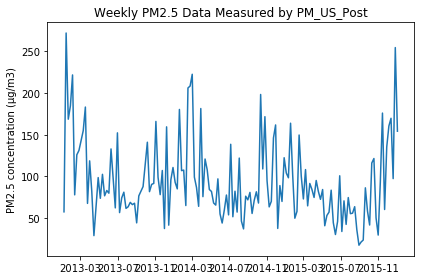

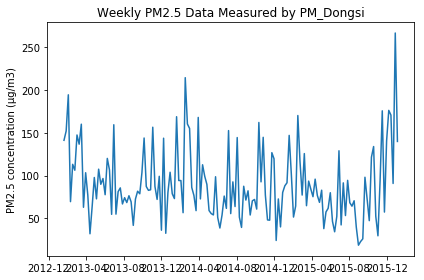

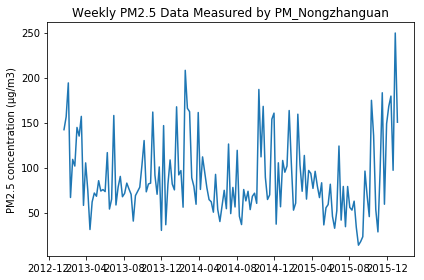

In [7]:
plt.figure()
title('Weekly PM2.5 Data Measured by PM_US_Post')
plot(df_Beijing['PM_US Post']['2013':].resample('W').mean(), label='US Post')
plt.ylabel('PM2.5 concentration (µg/m3)')
plt.tight_layout()

plt.figure()
title('Weekly PM2.5 Data Measured by PM_Dongsi')
plot(df_Beijing['PM_Dongsi']['2013':].resample('W').mean(), label='Dongsi')
plt.ylabel('PM2.5 concentration (µg/m3)')
plt.tight_layout()

plt.figure()
title('Weekly PM2.5 Data Measured by PM_Nongzhanguan')
plot(df_Beijing['PM_Nongzhanguan']['2013':].resample('W').mean(), label='Nongzhanguan')
plt.ylabel('PM2.5 concentration (µg/m3)')
plt.tight_layout()

At first glance, it appears that the data are fairly similar. This is to be expected since the measurement centers are at most 5 km from one another. Therefore, the data should be roughly the same, although each center may record slightly different measurements due to local variations in the PM2.5 concentration.

Given that PM_US Post, PM_Dongsi, and PM_Nongzhanguan contain different numbers of NaN's, it will be interesting to investigate how these NaN's are distributed within each series:

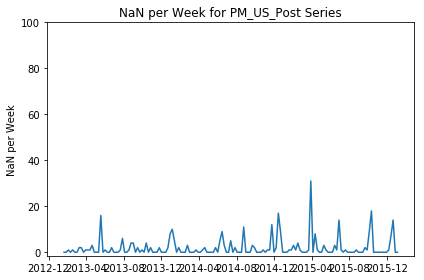

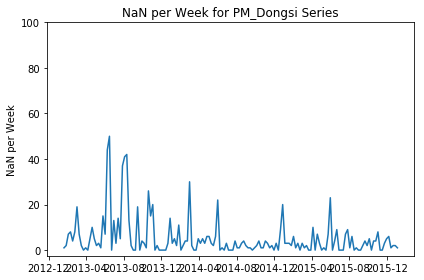

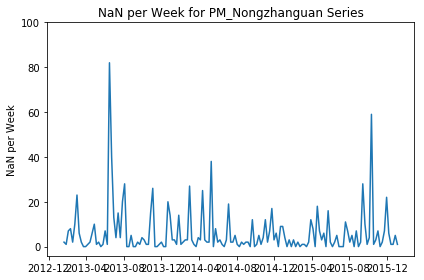

In [8]:
# Count how many NaN's appear in each month and plot it:
df_Beijing_PM_US_Post_NaNweekly = df_Beijing['PM_US Post']['2013-01-17 06:00:00':].isnull().resample('W').sum()
df_Beijing_PM_Dongsi_NaNweekly = df_Beijing['PM_Dongsi']['2013-01-17 06:00:00':].isnull().resample('W').sum()
df_Beijing_PM_Nongzhanguan_NaNweekly = df_Beijing['PM_Nongzhanguan']['2013-01-17 06:00:00':].isnull().resample('W').sum()

plt.figure()
title('NaN per Week for PM_US_Post Series')
plt.plot(df_Beijing_PM_US_Post_NaNweekly)
plt.yticks(arange(0,120,20))
plt.ylabel('NaN per Week')
plt.tight_layout()

plt.figure()
title('NaN per Week for PM_Dongsi Series')
plt.plot(df_Beijing_PM_Dongsi_NaNweekly)
plt.yticks(arange(0,120,20))
plt.ylabel('NaN per Week')
plt.tight_layout()

plt.figure()
title('NaN per Week for PM_Nongzhanguan Series')
plt.plot(df_Beijing_PM_Nongzhanguan_NaNweekly)
plt.yticks(arange(0,120,20))
plt.ylabel('NaN per Week')
plt.tight_layout()

Interestingly, the number of NaN's per week over time look somewhat similar between PM_Dongsi and PM_Nongzhanguan. How strong is the correlation? Calculate the Pearson-r correlation coefficient:

In [9]:
Pearsonr_US_Post_Dongsi_r, Pearsonr_US_Post_Dongsi_pvalue = pearsonr(df_Beijing_PM_US_Post_NaNweekly,df_Beijing_PM_Dongsi_NaNweekly)
Pearsonr_Dongsi_Nongzhanguan_r, Pearsonr_Dongsi_Nongzhanguan_pvalue = pearsonr(df_Beijing_PM_Dongsi_NaNweekly,df_Beijing_PM_Nongzhanguan_NaNweekly)
                                   
print("Pearson r correlation between PM_US_Post and PM_Dongsi: " + str(Pearsonr_US_Post_Dongsi_r) + "; p-value: " + str(Pearsonr_US_Post_Dongsi_pvalue))
print("Pearson r correlation between PM_Dongsi and PM_Nongzhanguan: " + str(Pearsonr_Dongsi_Nongzhanguan_r) + "; p-value: " + str(Pearsonr_Dongsi_Nongzhanguan_pvalue))

Pearson r correlation between PM_US_Post and PM_Dongsi: -0.116188326287; p-value: 0.149950968069
Pearson r correlation between PM_Dongsi and PM_Nongzhanguan: 0.42831897207; p-value: 2.70282734558e-08


There is a positive correlation of 0.428 between the PM_Dongsi and PM_Nongzhanguan measurement centers with p-value 0.0000000270, while the PM_Dongsi and PM_US Post measurement centers show a weak negative correlation of -0.116 with p-value 0.150. These correlation numbers suggest that some of the instances when no data was recorded for PM_Dongsi and PM_Nongzhanguan may have been deliberately chosen, possibly for equipment maintenance or calibration. If these intentional periods of outage happen to correspond with other parameters like temperature, pressure, humidity, etc., then it may be possible to predict when the PM_Dongsi and PM_Nongzhanguan measurement centers tend to be out of service. **This will be further studied later.**

Since daily averages may be strongly impacted by the absense of measurements, it would be helpful to find out which days contain several NaNs:

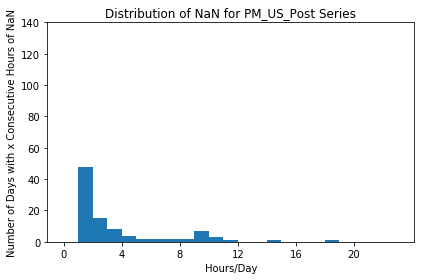

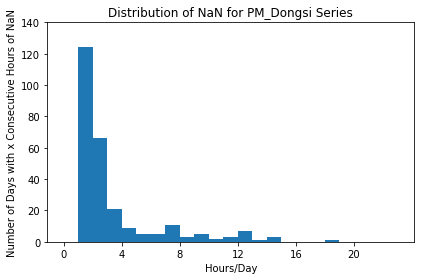

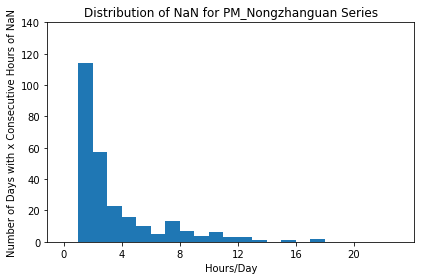

In [10]:
# How often do NaNs appear each day? Plot the number of days for which there is x number of NaN values, reflecting
# the number of hours that no data was recorded.
df_Beijing_PM_US_Post_dailymean = df_Beijing['PM_US Post']['2013-01-17 06:00:00':].isnull().resample('D').sum()
df_Beijing_PM_Dongsi_dailymean = df_Beijing['PM_Dongsi']['2013-01-17 06:00:00':].isnull().resample('D').sum()
df_Beijing_PM_Nongzhanguan_dailymean = df_Beijing['PM_Nongzhanguan']['2013-01-17 06:00:00':].isnull().resample('D').sum()

# Drop the days where there are no NaNs.
df_Beijing_PM_US_Post_dailymean = df_Beijing_PM_US_Post_dailymean.loc[(df_Beijing_PM_US_Post_dailymean>0)]
df_Beijing_PM_Dongsi_dailymean = df_Beijing_PM_Dongsi_dailymean.loc[(df_Beijing_PM_Dongsi_dailymean>0)]
df_Beijing_PM_Nongzhanguan_dailymean = df_Beijing_PM_Nongzhanguan_dailymean.loc[(df_Beijing_PM_Nongzhanguan_dailymean>0)]

plt.figure()
title('Distribution of NaN for PM_US_Post Series')
plt.hist(df_Beijing_PM_US_Post_dailymean,bins=range(0,24,1))
plt.xticks(arange(0,24,4))
plt.yticks(arange(0,160,20))
plt.xlabel('Hours/Day')
plt.ylabel('Number of Days with x Consecutive Hours of NaN')
plt.tight_layout()

plt.figure()
title('Distribution of NaN for PM_Dongsi Series')
plt.hist(df_Beijing_PM_Dongsi_dailymean,bins=range(0,24,1))
plt.xticks(arange(0,24,4))
plt.yticks(arange(0,160,20))
plt.xlabel('Hours/Day')
plt.ylabel('Number of Days with x Consecutive Hours of NaN')
plt.tight_layout()

plt.figure()
title('Distribution of NaN for PM_Nongzhanguan Series')
plt.hist(df_Beijing_PM_Nongzhanguan_dailymean,bins=range(0,24,1))
plt.xticks(arange(0,24,4))
plt.yticks(arange(0,160,20))
plt.xlabel('Hours/Day')
plt.ylabel('Number of Days with x Consecutive Hours of NaN')
plt.tight_layout()

The histograms count the number of days that a certain number of hours of NaN occurred over the course of one day. For all 3 measurement centers there are significantly more days with 1 hour of NaN compared to days with 2 or more hours of NaN. Since the calculated mean PM2.5 levels for days with several missing data points may not accurately represent the true mean for those days, days showing more than 2 NaNs will be discarded. This operation will be performed later.

To investigate the days containing several NaNs, it would be helpful to see whether they occur as isolated events or consecutively over several hours:

In [11]:
# Function consecNaN() constructs a list of the number of hours that the NaN's appear consecutively:
def consecNaN(NaNorNot):
    consecutive = []
    counter = 0
    before = False
    for ii in NaNorNot:
        if ii == True:
            if before == False:
                counter = 1
            else:
                counter += 1
            before = True
        else:
            if before == True:
                consecutive.append(counter)
            before = False
    return consecutive

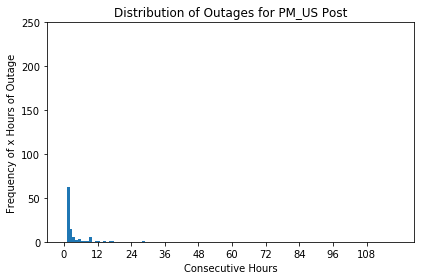

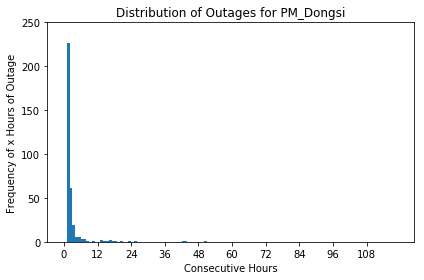

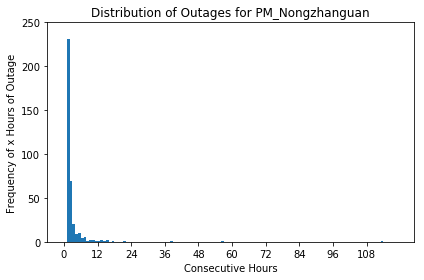

In [12]:
PM_US_Post_consecNaN = consecNaN(df_Beijing['PM_US Post']['2013-01-17 06:00:00':].isnull())
PM_Dongsi_consecNaN = consecNaN(df_Beijing['PM_Dongsi']['2013-01-17 06:00:00':].isnull())
PM_Nongzhanguan_consecNaN = consecNaN(df_Beijing['PM_Nongzhanguan']['2013-01-17 06:00:00':].isnull())

plt.figure()
plt.hist(PM_US_Post_consecNaN,bins=range(0,120,1))
plt.title('Distribution of Outages for PM_US Post')
plt.xticks(arange(0,120,12))
plt.xlabel('Consecutive Hours')
plt.ylabel('Frequency of x Hours of Outage')
plt.yticks(arange(0,300,50))
plt.tight_layout()

plt.figure()
plt.hist(PM_Dongsi_consecNaN,bins=range(0,120,1))
plt.title('Distribution of Outages for PM_Dongsi')
plt.xticks(arange(0,120,12))
plt.xlabel('Consecutive Hours')
plt.ylabel('Frequency of x Hours of Outage')
plt.yticks(arange(0,300,50))
plt.tight_layout()

plt.figure()
plt.hist(PM_Nongzhanguan_consecNaN,bins=range(0,120,1))
plt.title('Distribution of Outages for PM_Nongzhanguan')
plt.xticks(arange(0,120,12))
plt.xlabel('Consecutive Hours')
plt.ylabel('Frequency of x Hours of Outage')
plt.yticks(arange(0,300,50))
plt.tight_layout()

For all measurement centers, the number of isolated NaN far outnumber NaN occurring over several hours. This suggests that random errors in measurement occur more frequently than prolonged outages possibly caused by equipment failure, maintenance, calibration, or severe outdoor conditions. Among the 3 measurement centers, PM_US Post shows by far the least number of days with one hour of NaN, as well as shorter periods of consecutive NaN overall.

Now, we will take a look out how different the measurements are across the 3 measurement centers by plotting their standard deviation:

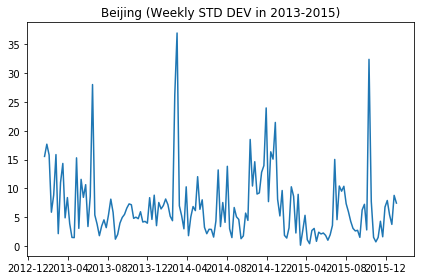

In [13]:
df_Beijing_M = [df_Beijing['PM_US Post'].resample('M').mean()['2013':],
                      df_Beijing['PM_Dongsi'].resample('M').mean()['2013':],
                      df_Beijing['PM_Nongzhanguan'].resample('M').mean()['2013':]]
df_Beijing_M = pd.DataFrame(df_Beijing_M)

df_Beijing_W = [df_Beijing['PM_US Post'].resample('W').mean()['2013':],
                      df_Beijing['PM_Dongsi'].resample('W').mean()['2013':],
                      df_Beijing['PM_Nongzhanguan'].resample('W').mean()['2013':]]
df_Beijing_W = pd.DataFrame(df_Beijing_W)

df_Beijing_D = [df_Beijing['PM_US Post'].resample('D').mean()['June 9, 2015':'June 15, 2015'],
                      df_Beijing['PM_Dongsi'].resample('D').mean()['June 9, 2015':'June 15, 2015'],
                      df_Beijing['PM_Nongzhanguan'].resample('D').mean()['June 9, 2015':'June 15, 2015']]
df_Beijing_D = pd.DataFrame(df_Beijing_D)

df_Beijing_H = [df_Beijing['PM_US Post']['June 13, 2015'],
                      df_Beijing['PM_Dongsi']['June 13, 2015'],
                      df_Beijing['PM_Nongzhanguan']['June 13, 2015']]
df_Beijing_H = pd.DataFrame(df_Beijing_H)

plt.figure()
title('Beijing (Weekly STD DEV in 2013-2015)')
plot(df_Beijing_W.std())
plt.tight_layout()

The plot shows that the measurements vary most significantly for the months of March 2014, November 2014, and January 2015. These months are plotted individually to observe how the PM2.5 data differ across the measurement centers.

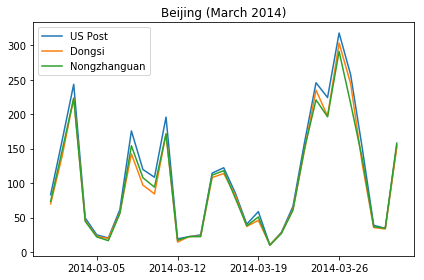

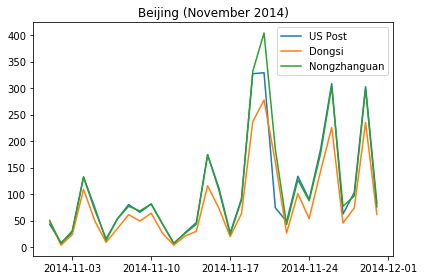

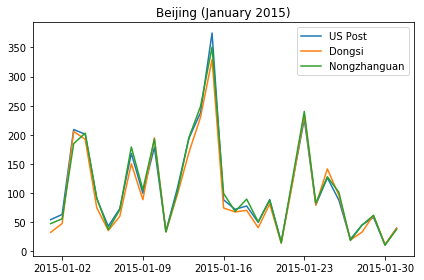

In [14]:
plt.figure()
title('Beijing (March 2014)')
plot(df_Beijing['PM_US Post']['2014-Mar'].resample('D').mean(), label='US Post')
plot(df_Beijing['PM_Dongsi']['2014-Mar'].resample('D').mean(), label='Dongsi')
plot(df_Beijing['PM_Nongzhanguan']['2014-Mar'].resample('D').mean(), label='Nongzhanguan')
plt.legend()
plt.tight_layout()

plt.figure()
title('Beijing (November 2014)')
plot(df_Beijing['PM_US Post']['2014-Nov'].resample('D').mean(), label='US Post')
plot(df_Beijing['PM_Dongsi']['2014-Nov'].resample('D').mean(), label='Dongsi')
plot(df_Beijing['PM_Nongzhanguan']['2014-Nov'].resample('D').mean(), label='Nongzhanguan')
plt.legend()
plt.tight_layout()

plt.figure()
title('Beijing (January 2015)')
plot(df_Beijing['PM_US Post']['2015-Jan'].resample('D').mean(), label='US Post')
plot(df_Beijing['PM_Dongsi']['2015-Jan'].resample('D').mean(), label='Dongsi')
plot(df_Beijing['PM_Nongzhanguan']['2015-Jan'].resample('D').mean(), label='Nongzhanguan')
plt.legend()
plt.tight_layout()

The data appear to diverge the most when the PM2.5 concentration level peaks over 250 µg/m3. This suggests that higher concentration levels may be more difficult to measure, resulting in larger discrepancy among the measurement centers. There is no consistent trend as to which center records the highest ratings. There are periods when each center records the highest concentration level among all the centers.

Overall, there are many factors that can cause the measurement centers to record different readings: differences in the local concentration level and weather conditions, differences in the model of equipment and method of calibration, etc. Therefore for simplicity, we will proceed with this study by analyzing only one data series -- PM_US_Post -- from 2010 to 2015.

Now, to clean the PM2.5 concentration data, all days with more than 2 hours of missing data will be removed:

In [15]:
# Search for the days when there are more than 2 hours of missing data:
more_than_2hrs = df_Beijing['PM_US Post'].isnull().resample('D').sum() > 2
more_than_2hrs = more_than_2hrs[more_than_2hrs == True]

In [16]:
df_Beijing_unclean = df_Beijing['PM_US Post'].resample('D').mean()

In [17]:
# Remove the days with more than 2 hours of missing data:
df_Beijing_clean = df_Beijing_unclean.drop(more_than_2hrs.index)

In [18]:
df_Beijing_clean.head()

2010-01-02    144.333333
2010-01-03     78.375000
2010-01-04     29.291667
2010-01-05     43.541667
2010-01-06     59.375000
Name: PM_US Post, dtype: float64

In [19]:
df_Beijing_clean = df_Beijing_clean.resample('M').mean()

In [20]:
df_Beijing_clean.head()

2010-01-31    89.750000
2010-02-28    97.229296
2010-03-31    92.704580
2010-04-30    79.927399
2010-05-31    87.082323
Freq: M, Name: PM_US Post, dtype: float64

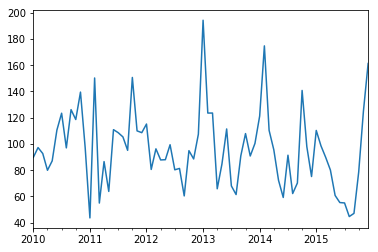

In [21]:
df_Beijing_clean.plot()

Next, we will incorporate the data for temperature, humidity, pressure, and dew point into the DataFrame. First, we preview the data.

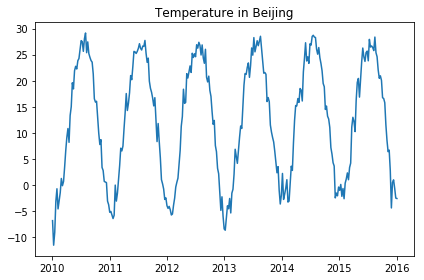

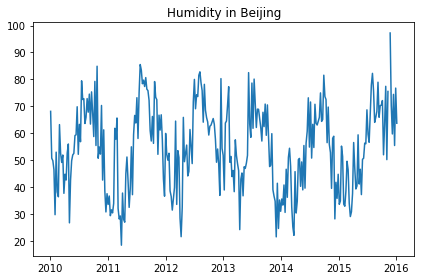

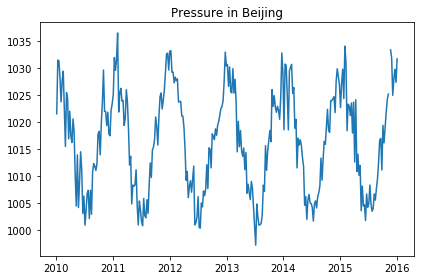

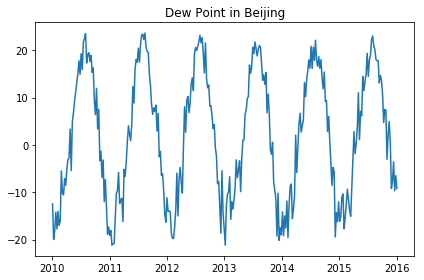

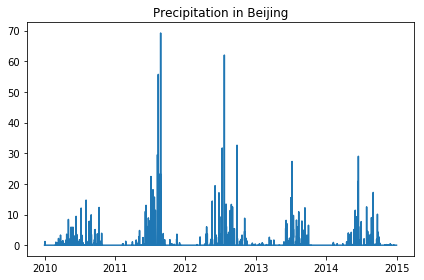

In [67]:
plt.figure()
title('Temperature in Beijing')
plot(df_Beijing['TEMP'].resample('W').mean())
plt.tight_layout()

plt.figure()
title('Humidity in Beijing')
plot(df_Beijing['HUMI'].resample('W').mean())
plt.tight_layout()

plt.figure()
title('Pressure in Beijing')
plot(df_Beijing['PRES'].resample('W').mean())
plt.tight_layout()

plt.figure()
title('Dew Point in Beijing')
plot(df_Beijing['DEWP'].resample('W').mean())
plt.tight_layout()

plt.figure()
title('Precipitation in Beijing')
plot(df_Beijing['precipitation']['2010':'2014'])
plt.tight_layout()

The plots show that the data are cyclical, as expected. Notably, temperature and dew point appear almost identical, while pressure shows a negative correlation to these parameters. If these parameters are strongly correlated, including all 3 in our eventual analysis may be redundant. It would be helpful to find the Pearson-r correlation:

In [23]:
Pearsonr_TEMP_DEWP_r, Pearsonr_TEMP_DEWP_pvalue = pearsonr(df_Beijing['TEMP'].resample('M').mean(),df_Beijing['DEWP'].resample('M').mean())
Pearsonr_TEMP_PRES_r, Pearsonr_TEMP_PRES_pvalue = pearsonr(df_Beijing['TEMP'].resample('M').mean(),df_Beijing['PRES'].resample('M').mean())
Pearsonr_TEMP_HUMI_r, Pearsonr_TEMP_HUMI_pvalue = pearsonr(df_Beijing['TEMP'].resample('M').mean(),df_Beijing['HUMI'].resample('M').mean())                  
    
print("Pearson r correlation between TEMP and DEWP: " + str(Pearsonr_TEMP_DEWP_r) + "; p-value: " + str(Pearsonr_TEMP_DEWP_pvalue))
print("Pearson r correlation between TEMP and PRES: " + str(Pearsonr_TEMP_PRES_r) + "; p-value: " + str(Pearsonr_TEMP_PRES_pvalue))
print("Pearson r correlation between TEMP and HUMI: " + str(Pearsonr_TEMP_HUMI_r) + "; p-value: " + str(Pearsonr_TEMP_HUMI_pvalue))

Pearson r correlation between TEMP and DEWP: 0.961951867958; p-value: 3.54781142634e-41
Pearson r correlation between TEMP and PRES: -0.949046814835; p-value: 7.84632098232e-37
Pearson r correlation between TEMP and HUMI: 0.542603582552; p-value: 8.4930788476e-07


The Pearson-r values show a strong positive correlation between temperature and dew point and a strong negative correlation between temperature and pressure. Therefore, to avoid redundancy, we will keep the temperature series and not retain the dew point and pressure series.

Now, we will construct the DataFrame:

In [24]:
# Now, we begin to assemble one DataFrame with all the parameters we are interested in studying:
df_Beijing_clean = pd.DataFrame(df_Beijing_clean)
df_Beijing_clean['TEMP'] = df_Beijing['TEMP'].resample('M').mean()
df_Beijing_clean['HUMI'] = df_Beijing['HUMI'].resample('M').mean()

In [25]:
df_Beijing_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2010-01-31 to 2015-12-31
Freq: M
Data columns (total 3 columns):
PM_US Post    72 non-null float64
TEMP          72 non-null float64
HUMI          72 non-null float64
dtypes: float64(3)
memory usage: 2.2 KB


In [26]:
df_Beijing_clean.head()

,PM_US Post,TEMP,HUMI
2010-01-31,89.750000,-6.162634,46.449597
2010-02-28,97.229296,-1.922619,47.644345
2010-03-31,92.704580,3.293011,49.841398
2010-04-30,79.927399,10.806944,43.124306
2010-05-31,87.082323,20.831989,48.200269


In [27]:
df_Beijing_clean.tail()

,PM_US Post,TEMP,HUMI
2015-08-31,44.647908,25.829071,70.355316
2015-09-30,47.083344,20.408333,72.455556
2015-10-31,78.563988,13.827957,60.688172
2015-11-30,124.822222,2.897079,75.958442
2015-12-31,161.329922,-0.617766,65.391655


Now, we will also add some additional data of passenger-kilometers via 4 methods of transportation: railways, highways, waterways, and civil aviation. The data were obtained from Quandl. It will be interesting to see if these data correlate with the PM2.5 concentration:

In [28]:
df_railways = pd.read_csv('NBSC-A070405_M.csv')
df_highways = pd.read_csv('NBSC-A070409_M.csv')
df_waterways = pd.read_csv('NBSC-A07040D_M.csv')
df_civilaviation = pd.read_csv('NBSC-A07040H_M.csv')

In [29]:
df_railways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
Date     134 non-null object
Value    134 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [30]:
df_railways.head()

,Date,Value
0,2016-02-29,1256.57469
1,2016-01-31,1002.13000
2,2015-12-31,750.61000
3,2015-11-30,802.66473
4,2015-10-31,1004.34186


In [31]:
df_railways.tail()

,Date,Value
129,2005-05-31,487.96
130,2005-04-30,476.69
131,2005-03-31,528.91
132,2005-02-28,623.19
133,2005-01-31,483.96


In [32]:
df_railways = df_railways.set_index('Date')
del df_railways.index.name

In [33]:
df_railways.head()

,Value
2016-02-29,1256.57469
2016-01-31,1002.13000
2015-12-31,750.61000
2015-11-30,802.66473
2015-10-31,1004.34186


In [34]:
df_railways = df_railways.sort_index()

In [35]:
df_Beijing_clean['RAIL'] = df_railways.Value['2010':'2016']

In [36]:
df_Beijing_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2010-01-31 to 2015-12-31
Freq: M
Data columns (total 4 columns):
PM_US Post    72 non-null float64
TEMP          72 non-null float64
HUMI          72 non-null float64
RAIL          72 non-null float64
dtypes: float64(4)
memory usage: 2.8 KB


In [37]:
df_Beijing_clean.head()

,PM_US Post,TEMP,HUMI,RAIL
2010-01-31,89.750000,-6.162634,46.449597,692.320000
2010-02-28,97.229296,-1.922619,47.644345,815.831407
2010-03-31,92.704580,3.293011,49.841398,747.180170
2010-04-30,79.927399,10.806944,43.124306,698.560000
2010-05-31,87.082323,20.831989,48.200269,679.833000


In [38]:
df_Beijing_clean.tail()

,PM_US Post,TEMP,HUMI,RAIL
2015-08-31,44.647908,25.829071,70.355316,1286.66629
2015-09-30,47.083344,20.408333,72.455556,1028.49000
2015-10-31,78.563988,13.827957,60.688172,1004.34186
2015-11-30,124.822222,2.897079,75.958442,802.66473
2015-12-31,161.329922,-0.617766,65.391655,750.61000


Adding the railway data is relatively straightforward. Moving on to the data for highways, waterways, and civil aviation:

In [39]:
df_highways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
Date     125 non-null object
Value    125 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [40]:
df_waterways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
Date     125 non-null object
Value    125 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [41]:
df_civilaviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
Date     134 non-null object
Value    134 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


It is observed that df_highways and df_waterways do not contain the same number of values as df_civilaviation. We will resample df_highways and df_waterways by month to yield the correct number of rows, and then we will perform linear interpolation to fill in the missing data points:

In [42]:
# Prime the dataframe

# Iterate over the dates_list 
def str2datetime(dates_list):
    dates_datetime = []
    for date_str in dates_list:
        # Convert each date to a datetime object: date_dt
        dates_datetime.append(datetime.datetime.strptime(date_str,"%Y-%m-%d"))
    return(dates_datetime)

In [43]:
waterways_datetime = str2datetime(list(df_waterways.Date))

In [44]:
print(pd.Series(waterways_datetime))

0     2016-02-29
1     2016-01-31
2     2015-11-30
3     2015-10-31
4     2015-09-30
5     2015-08-31
6     2015-07-31
7     2015-06-30
8     2015-05-31
9     2015-04-30
10    2015-03-31
11    2015-02-28
12    2015-01-31
13    2014-11-30
14    2014-10-31
15    2014-09-30
16    2014-08-31
17    2014-07-31
18    2014-06-30
19    2014-05-31
20    2014-04-30
21    2014-03-31
22    2014-02-28
23    2014-01-31
24    2013-11-30
25    2013-10-31
26    2013-09-30
27    2013-08-31
28    2013-07-31
29    2013-06-30
         ...    
95    2007-06-30
96    2007-05-31
97    2007-04-30
98    2007-03-31
99    2007-02-28
100   2007-01-31
101   2006-12-31
102   2006-11-30
103   2006-10-31
104   2006-09-30
105   2006-08-31
106   2006-07-31
107   2006-06-30
108   2006-05-31
109   2006-04-30
110   2006-03-31
111   2006-02-28
112   2006-01-31
113   2005-12-31
114   2005-11-30
115   2005-10-31
116   2005-09-30
117   2005-08-31
118   2005-07-31
119   2005-06-30
120   2005-05-31
121   2005-04-30
122   2005-03-

In [45]:
df_waterways.head()

,Date,Value
0,2016-02-29,5.60
1,2016-01-31,4.29
2,2015-11-30,5.70
3,2015-10-31,6.71
4,2015-09-30,6.87


In [46]:
df_waterways.Date = pd.Series(waterways_datetime)

In [47]:
df_waterways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
Date     125 non-null datetime64[ns]
Value    125 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [48]:
df_waterways.head()

,Date,Value
0,2016-02-29,5.60
1,2016-01-31,4.29
2,2015-11-30,5.70
3,2015-10-31,6.71
4,2015-09-30,6.87


In [49]:
df_waterways = df_waterways.set_index('Date')

In [50]:
df_waterways.head()

,Value
Date,
2016-02-29,5.60
2016-01-31,4.29
2015-11-30,5.70
2015-10-31,6.71
2015-09-30,6.87


In [51]:
df_waterways = df_waterways.sort_index()

In [52]:
df_waterways = df_waterways.resample('M').mean()

In [53]:
df_waterways.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134 entries, 2005-01-31 to 2016-02-29
Freq: M
Data columns (total 1 columns):
Value    125 non-null float64
dtypes: float64(1)
memory usage: 2.1 KB


In [54]:
df_waterways.tail()

,Value
Date,
2015-10-31,6.71
2015-11-30,5.70
2015-12-31,NaN
2016-01-31,4.29
2016-02-29,5.60


In [55]:
highways_datetime = str2datetime(list(df_highways.Date))
df_highways.Date = pd.Series(highways_datetime)
df_highways = df_highways.set_index('Date')
df_highways.sort_index()
df_highways = df_highways.resample('M').mean()
df_highways.tail(20)

,Value
Date,
2014-07-31,1071.17
2014-08-31,1081.06
2014-09-30,1029.18
2014-10-31,1059.39
2014-11-30,882.10
2014-12-31,NaN
2015-01-31,917.12
2015-02-28,1197.76
2015-03-31,1157.42


In [56]:
df_waterways.Value = df_waterways.Value.interpolate(method='linear')
df_highways.Value = df_highways.Value.interpolate(method='linear')

In [57]:
df_Beijing_clean['HIGH'] = df_highways
df_Beijing_clean['WATER'] = df_waterways

In [58]:
df_Beijing_clean.head()

,PM_US Post,TEMP,HUMI,RAIL,HIGH,WATER
2010-01-31,89.750000,-6.162634,46.449597,692.320000,1152.01,3.890
2010-02-28,97.229296,-1.922619,47.644345,815.831407,1370.89,5.001
2010-03-31,92.704580,3.293011,49.841398,747.180170,1240.09,5.185
2010-04-30,79.927399,10.806944,43.124306,698.560000,1176.64,5.470
2010-05-31,87.082323,20.831989,48.200269,679.833000,1200.98,6.080


So far, so good. Finally, we add df_civilaviation to the DataFrame:

In [59]:
df_civilaviation.head()

,Date,Value
0,2016-02-29,674.63410
1,2016-01-31,655.15000
2,2015-12-31,607.69000
3,2015-11-30,589.20724
4,2015-10-31,642.06790


In [60]:
df_civilaviation = df_civilaviation.set_index('Date')

In [61]:
df_civilaviation.head()

,Value
Date,
2016-02-29,674.63410
2016-01-31,655.15000
2015-12-31,607.69000
2015-11-30,589.20724
2015-10-31,642.06790


In [62]:
df_civilaviation = df_civilaviation.sort_index()

In [63]:
df_Beijing_clean['AVIA'] = df_civilaviation['2010':'2016']

In [64]:
df_Beijing_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2010-01-31 to 2015-12-31
Freq: M
Data columns (total 7 columns):
PM_US Post    72 non-null float64
TEMP          72 non-null float64
HUMI          72 non-null float64
RAIL          72 non-null float64
HIGH          72 non-null float64
WATER         72 non-null float64
AVIA          72 non-null float64
dtypes: float64(7)
memory usage: 4.5 KB


In [65]:
df_Beijing_clean.head()

,PM_US Post,TEMP,HUMI,RAIL,HIGH,WATER,AVIA
2010-01-31,89.750000,-6.162634,46.449597,692.320000,1152.01,3.890,302.12480
2010-02-28,97.229296,-1.922619,47.644345,815.831407,1370.89,5.001,313.78907
2010-03-31,92.704580,3.293011,49.841398,747.180170,1240.09,5.185,329.08140
2010-04-30,79.927399,10.806944,43.124306,698.560000,1176.64,5.470,320.90744
2010-05-31,87.082323,20.831989,48.200269,679.833000,1200.98,6.080,320.38631


We now have a nice DataFrame containing observations in the form of rows and parameters in the form of columns. Data wrangling is now complete.